## Comparing Different Classifiers on Toy Datasets

Using synthetic data from scikit-learn's dataset module to visualize the decision boundaries created by a range of classifiers.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

%matplotlib inline

Declare the models and datasets that will be used:

In [6]:
models = {"3-Nearest Neighbors":KNeighborsClassifier(3),
          "Logistic Regression":LogisticRegression(),
          "Linear SVM": SVC(kernel="linear", C=0.025), 
          "RBF SVM":SVC(kernel='rbf', gamma='auto', C=1), 
          "Decision Tree":DecisionTreeClassifier(max_depth=5),
          "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1), 
          "AdaBoost":AdaBoostClassifier(n_estimators=100), 
          "Neural Net":MLPClassifier(alpha=1, max_iter=1000), 
          "Naive Bayes":GaussianNB(var_smoothing=0.001)}

# Create basic classification clusters
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Add some random noise to the classification clusters
rng = np.random.RandomState(1)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# Create the other datasets and add them to a list
initial_ds = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

Preprocess the datasets:

In [7]:
# Preprocess each dataset by using the StandardScaler to create train and test data sets
preprocessed_ds = []

for ds in initial_ds:
    X, y = ds
    X = StandardScaler().fit_transform(X)
    preprocessed_ds.append([X, train_test_split(X, y, test_size=.2, random_state=0)])

Fit each classifier to the training data and plot the decision boundary, and also show the score of the prediction accuracy in the bottom right hand corner each plot.

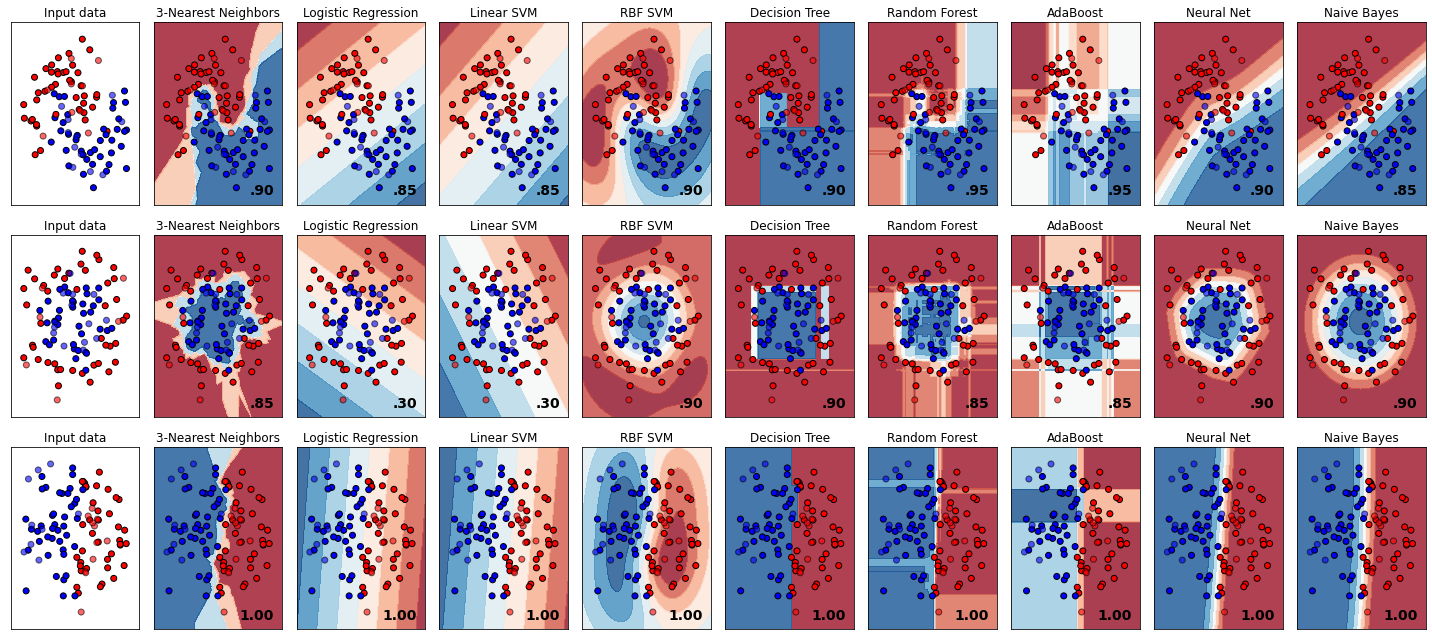

In [8]:
# Set up the plotting figure
fig, ax = plt.subplots(len(preprocessed_ds), len(models)+1, figsize=(20,9))

# Set the stepsize for the mesh grid and colormaps to be used
h = 0.02
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# For every dataset, plot the input data without any decision boundaries and then
# the boundary created by each classifier on the train data
for ax, ds in zip(ax, preprocessed_ds):
    
    # Get the data splits
    X = ds[0]
    X_train, X_test, y_train, y_test = ds[1]
    
    # Set up the meshgrid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
    # Plot the training points
    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plot the testing points
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    
    # Set axis and title
    ax[0].set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xticks=[], yticks=[])
    ax[0].set_title("Input data")
    
    # Plot the decision boundary of each model for the particular data set
    for i, (name, clf) in enumerate(models.items(), start=1):
        
        # Fit the model and retrieve the accuracy score on the test data
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # Retrieve the decision boundary
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Plot the decision boundary
        Z = Z.reshape(xx.shape)
        ax[i].contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        
        # Plot the testing points
        ax[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        # Set axis, title, and label the plot with the prediction accuracy score
        ax[i].set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xticks=[], yticks=[])
        ax[i].set_title(name)
        ax[i].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=14, weight='bold', horizontalalignment='right')

plt.tight_layout()